In [1]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise

# we are going to load nii images, and then have them get put through XNLM, NLM and then we can compare results after that

import ants

In [2]:
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [3]:
# question 1 : 
# Perona Malik and Black Algorithm

def perona_malik_1d( grad_value, K ) :
    # perona malik  can depend on the values of X and K 
    return 1 + 1/ (1 + (grad_value/k)**2 )

def perona_malik_2d(grad_value, K):
    return np.exp(-((grad_value/k)**2))


def black(grad_value, K):
    return 1 - 2*((grad_value**2) / (k**2))

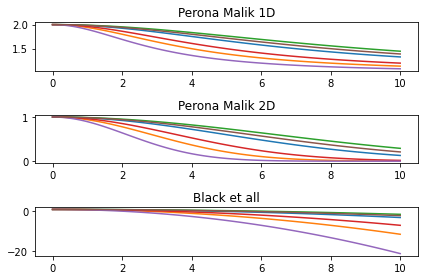

In [4]:
# Question 1 plotting of the data
import random
gradient_values = np.linspace(0, 10, num=100)

K = random.sample(range(1, 10), 6)

plt.subplot(311)
plt.title("Perona Malik 1D")
for k in K:
    plt.plot(gradient_values, perona_malik_1d(gradient_values, k),label=f'K={K}')

plt.subplot(312)
plt.title("Perona Malik 2D")
for k in K:
    plt.plot(gradient_values, perona_malik_2d(gradient_values, k),label=f'K={K}')

plt.subplot(313)
plt.title("Black et all")
for k in K:
    plt.plot(gradient_values, black(gradient_values, k),label=f'K={K}')


plt.tight_layout()
plt.show()

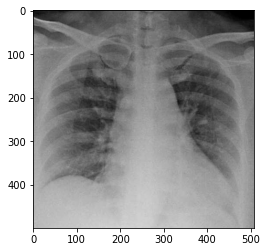

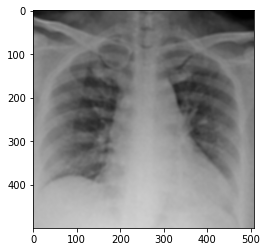

In [39]:
# Question 3
# Loading a png file and running XNLM on it , and recording the outputs

image = cv2.imread("../MIA_A4/Chest_XRay.jpg")
plt.imshow(image)
plt.show()

# image = image.astype('float64')
sigma_est = np.mean(estimate_sigma(image, multichannel=True))
patch_kw = dict(patch_size=1,      # 5x5 patches
                patch_distance=3,  # 13x13 search area
                multichannel=True)

denoise2_fast = denoise_nl_means(image, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw, preserve_range=0)

plt.imshow(denoise2_fast)
plt.show()



In [34]:
# Finding the diff between the two images
# here we shall print the abs difference between the images
abs_difference = np.sum(np.abs(denoise2_fast - image))

print("The absolute difference in magnitude between the two images is " , round(abs_difference, 3))

The absolute difference in magnitude between the two images is  97556493.897
